In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importante os dados:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


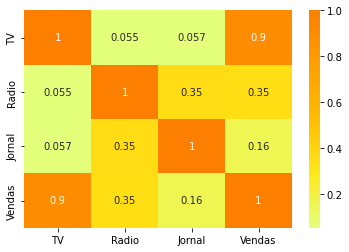

In [5]:
# Analisando as correlações dos nosso dados:
sns.heatmap(df.corr(), annot=True, cmap="Wistia")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
y = df["Vendas"]
x = df.drop("Vendas", axis=1)

In [8]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [10]:
# Cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

In [11]:
# Treina as inteligencias artificias
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [12]:
from sklearn import metrics
# Criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

In [13]:
# Comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao)) 

0.9071151423684273
0.9629953008905843


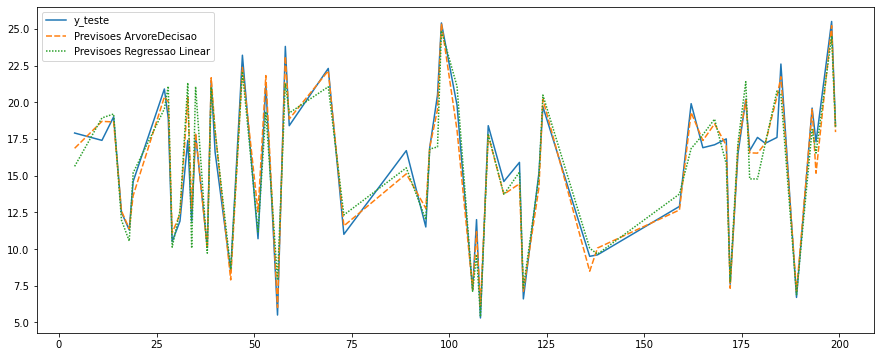

In [14]:
# Visualizando graficamente nossa previsão:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [15]:
# Fazendo uma nova previsão com outro banco de dados:
novo_df = pd.read_csv("novos.csv")
novo_df

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [16]:
previsao = modelo_arvoredecisao.predict(novo_df)
print(previsao)

[ 7.478  8.609 20.127]


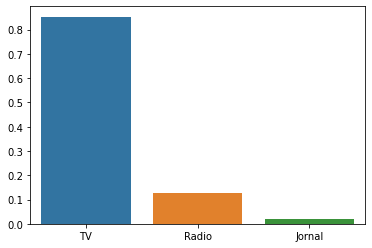

In [17]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

In [18]:
print(df[["Radio", "Jornal"]].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64
